In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, 
                          Dropout, Rescaling, RandomFlip, RandomRotation, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#np.loadtxt imports text files in python and sotres them in an nd array
train = np.loadtxt('C:\\Users\\Harshal Bhagat\\Downloads\\digit-recognizer\\train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('C:\\Users\\Harshal Bhagat\\Downloads\\digit-recognizer\\test.csv', delimiter=',', skiprows=1)

In [9]:
#reshape the size of the arrays
train_label = train[:, 0]

train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

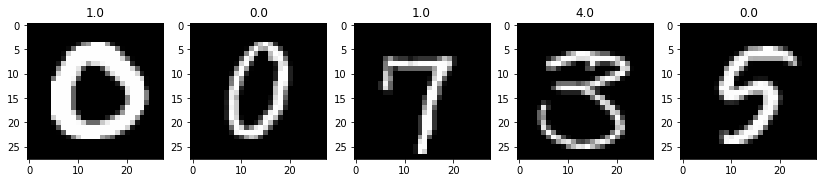

In [12]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[4:9], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [16]:
unique, counts = np.unique(train_label, return_counts=True)
print(unique, counts)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


In [17]:
for i in range(len(unique)):
    print(f'Digit {i}: {counts[i] / len(train_label) * 100} %')

Digit 0: 9.838095238095237 %
Digit 1: 11.152380952380952 %
Digit 2: 9.945238095238096 %
Digit 3: 10.359523809523811 %
Digit 4: 9.695238095238096 %
Digit 5: 9.035714285714286 %
Digit 6: 9.85 %
Digit 7: 10.47857142857143 %
Digit 8: 9.673809523809524 %
Digit 9: 9.971428571428572 %


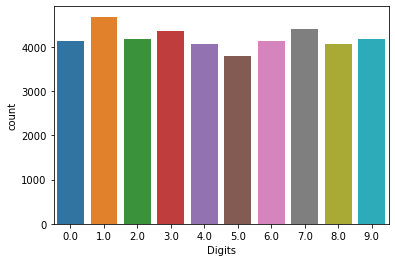

In [21]:
sns.countplot(x=train_label)
plt.xlabel('Digits')
plt.show;

In [22]:
#CNN Model Building
Y_train = to_categorical(train_label, num_classes = 10)



In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_img, Y_train, test_size = 0.2, random_state=42)


In [24]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [25]:
input_shape = (28, 28, 1)


In [26]:
width_shift_val = 0.1
height_shift_val = 0.1
shear_range_val=10
zoom_range_val= 0.1
random_rotation_val = 10
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = random_rotation_val,width_shift_range = width_shift_val,
                                                          height_shift_range = height_shift_val,zoom_range=zoom_range_val,)
datagen.fit(X_train)

In [27]:
early_stop = EarlyStopping(monitor="val_loss",min_delta=0, patience=12,
                           verbose=0,mode="min", baseline=None, restore_best_weights=True)

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', 
                 activation ='relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [29]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [30]:
batch_size = 32
num_epoch = 50
model_log = model.fit(X_train, y_train,
                      batch_size=batch_size,
                      epochs=num_epoch,
                      verbose=1,
                      validation_data=(X_test, y_test),
                      callbacks = [early_stop])

Epoch 1/50
 409/1050 [==========>...................] - ETA: 3:08 - loss: 0.5198 - accuracy: 0.8376

KeyboardInterrupt: 

In [ ]:
test = np.resize(test_img, (test_img.shape[0], 28, 28, 1))
pred = model.predict(test)
classes = pred.argmax(axis=-1)
classes